### 1. data preprocessing preprocessed the data frames from Gorilla Similarity task
### 2. within_category_similarity_distance use the preprocessed data frame and find the average rating within category
### 3. trialBased_PAperformance find the unique sequence and their percentage correctness (choose only absent block with if statement)
### 4. plot_relationship: combined rating and correctness plot relationsip

### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from scipy.stats import pearsonr, t
import seaborn as sns

In [2]:
def calculate_mean_and_min(distances):
    # Filter out "N/A" values
    numeric_distances = [d for d in distances if d != "N/A"]

    if not numeric_distances:  # Check if the list is empty after filtering
        return -1, -1  # Return "N/A" for both mean and min if no numeric values are found

    mean_distance = sum(numeric_distances) / len(numeric_distances)
    min_distance = min(numeric_distances)
    return mean_distance, min_distance


# Function to find mean and min distances
def calculate_distances(sequence, switch, distance_data):
    distances = []
    for note in sequence.split(','):
        note = note.strip()
        switch = switch.strip()

        # Retrieve distances for both AB and BA orders
        ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note}.wav") & (distance_data['Spreadsheet: B'] == f"{switch}.wav")]
        ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{switch}.wav") & (distance_data['Spreadsheet: B'] == f"{note}.wav")]

        # Initialize variables to store distances
        ab_distance = ba_distance = None

        # Check if AB order distance is available
        if not ab_row.empty:
            ab_distance = ab_row['Similarity_Distance'].iloc[0]

        # Check if BA order distance is available
        if not ba_row.empty:
            ba_distance = ba_row['Similarity_Distance'].iloc[0]

        # Calculate average distance if both distances are available, else take the available one
        if ab_distance is not None and ba_distance is not None:
            average_distance = (ab_distance + ba_distance) / 2
            distances.append(average_distance)
        elif ab_distance is not None:
            distances.append(ab_distance)
        elif ba_distance is not None:
            distances.append(ba_distance)
        else:
            distances.append("N/A")
            
    return calculate_mean_and_min(distances)

# Cat Meows ONlY; Function to find mean and min distances
def calculate_distances2(sequence, switch, distance_data):
    distances = []
    for note in sequence.split(','):
        note = note.strip().split('_', 1)[0]
        switch = switch.strip().split('_', 1)[0]
        #print(note, switch, f"{note}_300ms.wav", f"{switch}_300ms.wav")

        # Retrieve distances for both AB and BA orders
        ab_row = distance_data[(distance_data['Spreadsheet: A'] == f"{note}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{switch}_300ms.wav")]
        ba_row = distance_data[(distance_data['Spreadsheet: A'] == f"{switch}_300ms.wav") & (distance_data['Spreadsheet: B'] == f"{note}_300ms.wav")]

        # Initialize variables to store distances
        ab_distance = ba_distance = None

        # Check if AB order distance is available
        if not ab_row.empty:
            ab_distance = ab_row['Similarity_Distance'].iloc[0]

        # Check if BA order distance is available
        if not ba_row.empty:
            ba_distance = ba_row['Similarity_Distance'].iloc[0]

        # Calculate average distance if both distances are available, else take the available one
        if ab_distance is not None and ba_distance is not None:
            average_distance = (ab_distance + ba_distance) / 2
            distances.append(average_distance)
        elif ab_distance is not None:
            distances.append(ab_distance)
        elif ba_distance is not None:
            distances.append(ba_distance)
        else:
            distances.append("N/A")
            
    return calculate_mean_and_min(distances)

def plot_distances1(filtered_df_everyday, filtered_df_complexTone):
    plt.figure(figsize=(12, 6))

    # Plot for Average Distance
    plt.subplot(1, 2, 1)
    plt.scatter(filtered_df_everyday['Mean Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone['Mean Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('2a: Correctness vs. Average Distance')
    plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    plt.scatter(filtered_df_everyday['Min Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone['Min Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('2a: Correctness vs. Minimum Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_distances2(filtered_df_cat, filtered_df_complexTone):
    plt.figure(figsize=(12, 6))

    # Plot for Average Distance
    plt.subplot(1, 2, 1)
    plt.scatter(filtered_df_cat['Mean Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone['Mean Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('2b: Correctness vs. Average Distance')
    plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    plt.scatter(filtered_df_cat['Min Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone['Min Distance'], filtered_df_complexTone['Correctness'], color='red', label='ComplexTone')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    # Set y-axis tick labels to only include 0 to 1
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('2b: Correctness vs. Minimum Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    plt.figure(figsize=(12, 6))

    # Plot for Average Distance
    plt.subplot(1, 2, 1)
    plt.scatter(filtered_df_everyday['Mean Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone1['Mean Distance'], filtered_df_complexTone1['Correctness'], color='lightcoral', label='ComplexTone1')
    plt.scatter(filtered_df_cat['Mean Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone2['Mean Distance'], filtered_df_complexTone2['Correctness'], color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Average Distance')
    plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    plt.scatter(filtered_df_everyday['Min Distance'], filtered_df_everyday['Correctness'], color='green', label='Everyday')
    plt.scatter(filtered_df_complexTone1['Min Distance'], filtered_df_complexTone1['Correctness'], color='lightcoral', label='ComplexTone1')
    plt.scatter(filtered_df_cat['Min Distance'], filtered_df_cat['Correctness'], color='blue', label='Cat')
    plt.scatter(filtered_df_complexTone2['Min Distance'], filtered_df_complexTone2['Correctness'], color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Minimum Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    plt.figure(figsize=(12, 6))

    # Plot for Average Distance
    plt.subplot(1, 2, 1)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Average Distance')
    plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Minimum Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_2x2_mean_and_min_distances(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Create a figure for mean distances
    plt.figure(figsize=(12, 12))

    # Plot for Mean Distance - ComplexTone1 and Everyday
    plt.subplot(2, 2, 1)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Mean Distance (ComplexTone1)')
    plt.legend()

    plt.subplot(2, 2, 2)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Mean Distance (Everyday)')
    plt.legend()

    # Plot for Mean Distance - ComplexTone2 and Cat
    plt.subplot(2, 2, 3)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Mean Distance (ComplexTone2)')
    plt.legend()

    plt.subplot(2, 2, 4)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Mean Distance (Cat)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Create a figure for minimum distances
    plt.figure(figsize=(12, 12))

    # Plot for Min Distance - ComplexTone1 and Everyday
    plt.subplot(2, 2, 1)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Min Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Min Distance (ComplexTone1)')
    plt.legend()

    plt.subplot(2, 2, 2)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Min Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Min Distance (Everyday)')
    plt.legend()

    # Plot for Min Distance - ComplexTone2 and Cat
    plt.subplot(2, 2, 3)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Min Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Min Distance (ComplexTone2)')
    plt.legend()

    plt.subplot(2, 2, 4)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat')
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Min Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Min Distance (Cat)')
    plt.legend()

    plt.tight_layout()
    plt.show()


def plot_combined_distances_with_regression_and_scatter(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Combine all dataframes for overall regression
    combined_df = pd.concat([filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2])

    plt.figure(figsize=(12, 6))

    # Plot for Mean Distance
    plt.subplot(1, 2, 1)
    # Individual regression lines without confidence interval, including scatter points
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)
    # Combined regression line with confidence interval
    sns.regplot(x='Mean Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Mean Distance')
    plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    # Individual regression lines without confidence interval, including scatter points
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)
    # Combined regression line with confidence interval
    sns.regplot(x='Min Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})
    plt.xlim([0, 5])
    plt.ylim([0, 1.2])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Minimum Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_combined_distances_with_regression_and_scatter2(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2):
    # Combine all dataframes for overall regression
    combined_df = pd.concat([filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2])

    plt.figure(figsize=(12, 6))

    # Plot for Mean Distance
    plt.subplot(1, 2, 1)
    # Individual regression lines without confidence interval, including scatter points
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Mean Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)
    # Combined regression line with confidence interval
    #sns.regplot(x='Mean Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})
    plt.xlim([0, 5.5])
    plt.ylim([0, 1.1])
    plt.xlabel('Mean Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Mean Distance')
    #plt.legend()

    # Plot for Minimum Distance
    plt.subplot(1, 2, 2)
    # Individual regression lines without confidence interval, including scatter points
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_everyday, color='green', label='Everyday', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone1, color='lightcoral', label='ComplexTone1', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_cat, color='blue', label='Cat', ci=None)
    sns.regplot(x='Min Distance', y='Correctness', data=filtered_df_complexTone2, color='darkred', label='ComplexTone2', ci=None)
    # Combined regression line with confidence interval
    #sns.regplot(x='Min Distance', y='Correctness', data=combined_df, color='black', scatter=False, ci=95, line_kws={"color": "black"})
    plt.xlim([0, 5.5])
    plt.ylim([0, 1.1])
    plt.xlabel('Minimum Distance')
    plt.ylabel('Percent Correctness')
    plt.title('Correctness vs. Minimum Distance')
    #plt.legend()

    plt.tight_layout()

    save_path = os.path.join('/Users/willmacbookair/Downloads/Poster plot', "absent_relationship.svg")
    # save the plot
    plt.savefig(save_path, format='svg')
    plt.show()


def calculate_and_print_correlation(df, distance_type):
    # Extract category from dataframe variable name
    category = df.name.split('_')[-1]  # Assuming the df has a 'name' attribute set

    # Calculate Pearson correlation
    corr, _ = pearsonr(df[distance_type], df['Correctness'])
    
    # Calculate t-value and p-value
    n = len(df) 
    t_value = corr * np.sqrt((n - 2) / (1 - corr**2))
    df_degrees = n - 2
    p_value = 2 * (1 - t.cdf(np.abs(t_value), df_degrees))

    # Print results
    print(f"r ({category} - {distance_type}): {corr:.5f}, t-value: {t_value:.5f}, p-value: {p_value:.5f}, dof: {df_degrees}")


### Plot the relation sequence correctness and similarity distance 

#### Experiment 2a everyday sound & complex tones

In [3]:
# Everyday Sound
# distance metric
distanceED= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_everydaySound.csv"
# everyday sound
everydayCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/Everyday_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceED)
correctness_df = pd.read_csv(everydayCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Switch_Names']
    percent_correctness = row['Percent_Correctness']

    mean_distance, min_distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Mean Distance': 6 - mean_distance,
        'Min Distance': 6 - min_distance
    })

results_df_everyday = pd.DataFrame(results)
#print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_everyday = results_df_everyday[(results_df_everyday['Min Distance'] != -1) & (results_df_everyday['Mean Distance'] != -1)]
print(filtered_df_everyday)



                                             Sequence           Switch  \
0   bell_3ms, phone_ring_3ms, brush_teeth_3ms, bab...   car_engine_3ms   
1   brush_teeth_3ms, baby_3ms, phone_ring_3ms, sno...    foot_step_3ms   
2   car_engine_3ms, foot_step_3ms, bell_3ms, cough...         baby_3ms   
3   cough_3ms, brush_teeth_3ms, car_horn_3ms, bell...   phone_ring_3ms   
4   cough_3ms, brush_teeth_3ms, drink_water_3ms, c...        snore_3ms   
5   cough_3ms, laugh_3ms, brush_teeth_3ms, car_eng...        sheep_3ms   
6   drink_water_3ms, baby_3ms, car_horn_3ms, brush...    foot_step_3ms   
7   drink_water_3ms, car_horn_3ms, frog_3ms, car_e...    foot_step_3ms   
8   foot_step_3ms, sheep_3ms, phone_ring_3ms, moto...  drink_water_3ms   
9   foot_step_3ms, sizzling_pan_3ms, laugh_3ms, fr...   phone_ring_3ms   
10    frog_3ms, brush_teeth_3ms, sheep_3ms, snore_3ms     car_horn_3ms   
11           laugh_3ms, bell_3ms, frog_3ms, motor_3ms     car_horn_3ms   
12     laugh_3ms, snore_3ms, car_engin

In [4]:
# Complex Tones 
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/Everyday_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    sequence_names = row['Sequence_Names']
    switch_name = row['Switch_Names']
    percent_correctness = row['Percent_Correctness']

    mean_distance, min_distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Mean Distance': 6 - mean_distance,
        'Min Distance': 6 - min_distance
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone1 = results_df_complexTone[(results_df_complexTone['Min Distance'] != -1) & (results_df_complexTone['Mean Distance'] != -1)]
print(filtered_df_complexTone1)

                         Sequence   Switch  Correctness  Mean Distance  \
0        A4, C5, D#4_Eb4, C#5_Db5       C4        0.875       1.577350   
1        A4, D4, D#4_Eb4, F#4_Gb4  D#5_Eb5        0.875       1.073770   
2        A4, F#4_Gb4, A#4_Bb4, D5  G#4_Ab4        0.675       3.099369   
3                  A4, F4, D4, G4  G#4_Ab4        0.400       3.070833   
4        B4, F#4_Gb4, A4, C#5_Db5       D5        0.550       2.585119   
5   C#4_Db4, A#4_Bb4, C5, C#5_Db5       E4        0.775       1.914692   
6             C#4_Db4, D5, G4, C5       D4        0.450       2.189286   
7                  C4, B4, D4, E4  D#4_Eb4        0.375       3.312179   
8        C4, D#4_Eb4, C#4_Db4, A4       E4        0.550       3.214343   
9                  C4, D4, G4, A4       B4        0.725       2.217898   
10  D#5_Eb5, D#4_Eb4, C#4_Db4, C4       B4        0.750       1.897222   
11            D4, C#5_Db5, G4, D5  D#4_Eb4        0.850       2.232065   
12       D5, D#5_Eb5, C5, F#4_Gb4  C#4

#### correlation analysis 

In [5]:
# Pearson correlation for Average Distance
corr_avg_everyday, _ = pearsonr(filtered_df_everyday['Mean Distance'], filtered_df_everyday['Correctness'])
corr_avg_complexTone, _ = pearsonr(filtered_df_complexTone1['Mean Distance'], filtered_df_complexTone1['Correctness'])
print(f"Pearson correlation (Everyday - Avg Distance): {corr_avg_everyday:.3f}")
print(f"Pearson correlation (ComplexTone - Avg Distance): {corr_avg_complexTone:.3f}")

# Pearson correlation for Minimum Distance
corr_min_everyday, _ = pearsonr(filtered_df_everyday['Min Distance'], filtered_df_everyday['Correctness'])
corr_min_complexTone, _ = pearsonr(filtered_df_complexTone1['Min Distance'], filtered_df_complexTone1['Correctness'])
print(f"Pearson correlation (Everyday - Min Distance): {corr_min_everyday:.3f}")
print(f"Pearson correlation (ComplexTone - Min Distance): {corr_min_complexTone:.3f}")

# Combine the data from both categories
combined_df_mean = pd.concat([filtered_df_everyday[['Mean Distance', 'Correctness']], 
                                filtered_df_complexTone1[['Mean Distance', 'Correctness']]])
combined_df_min = pd.concat([filtered_df_everyday[['Min Distance', 'Correctness']], 
                                filtered_df_complexTone1[['Min Distance', 'Correctness']]])

# Pearson correlation for combined categories
corr_mean, p_value_mean = pearsonr(combined_df_mean['Mean Distance'], combined_df_mean['Correctness'])
corr_min, p_value_min = pearsonr(combined_df_min['Min Distance'], combined_df_min['Correctness'])

print(f"Pearson correlation (Combined - Mean Distance): {corr_mean:.3f}, p-value: {p_value_mean:.3f}")
print(f"Pearson correlation (Combined - Min Distance): {corr_min:.3f}, p-value: {p_value_min:.3f}")

#


Pearson correlation (Everyday - Avg Distance): -0.441
Pearson correlation (ComplexTone - Avg Distance): -0.674
Pearson correlation (Everyday - Min Distance): -0.567
Pearson correlation (ComplexTone - Min Distance): -0.584
Pearson correlation (Combined - Mean Distance): -0.603, p-value: 0.000
Pearson correlation (Combined - Min Distance): -0.590, p-value: 0.000


In [6]:
##
filtered_df_everyday.name = 'filtered_df_everyday'
filtered_df_complexTone1.name = 'filtered_df_complexTone'

calculate_and_print_correlation(filtered_df_everyday, 'Mean Distance')
calculate_and_print_correlation(filtered_df_complexTone1, 'Mean Distance')
calculate_and_print_correlation(filtered_df_everyday, 'Min Distance')
calculate_and_print_correlation(filtered_df_complexTone1, 'Min Distance')

# For combined data
combined_df_mean = pd.concat([filtered_df_everyday[['Mean Distance', 'Correctness']], 
                              filtered_df_complexTone1[['Mean Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df_mean'
calculate_and_print_correlation(combined_df_mean, 'Mean Distance')

combined_df_min = pd.concat([filtered_df_everyday[['Min Distance', 'Correctness']], 
                             filtered_df_complexTone1[['Min Distance', 'Correctness']]])
combined_df_min.name = 'combined_df_min'
calculate_and_print_correlation(combined_df_min, 'Min Distance')

r (everyday - Mean Distance): -0.44112, t-value: -2.08536, p-value: 0.05155, dof: 18
r (complexTone - Mean Distance): -0.67386, t-value: -3.86939, p-value: 0.00112, dof: 18
r (everyday - Min Distance): -0.56701, t-value: -2.92045, p-value: 0.00913, dof: 18
r (complexTone - Min Distance): -0.58408, t-value: -3.05292, p-value: 0.00685, dof: 18
r (mean - Mean Distance): -0.60279, t-value: -4.65708, p-value: 0.00004, dof: 38
r (min - Min Distance): -0.58964, t-value: -4.50038, p-value: 0.00006, dof: 38


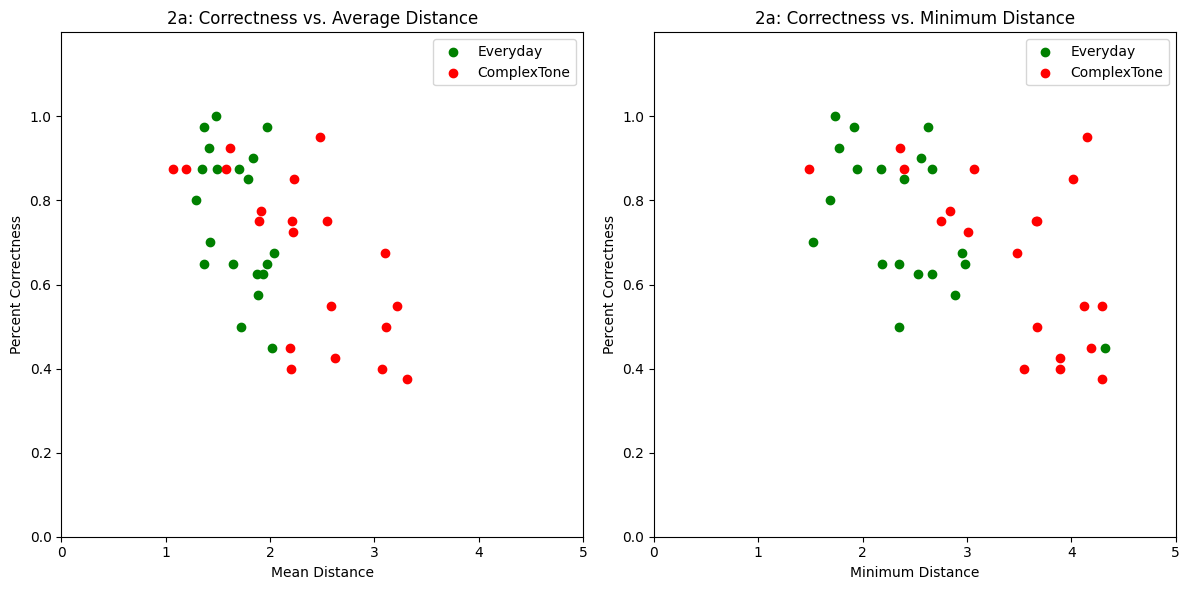

In [7]:
plot_distances1(filtered_df_everyday, filtered_df_complexTone1)

#### Cat Meows vs Complex Tones

In [8]:
# Cat Meows
# distance metric
distanceCM= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_catMeow.csv"
# cat meows
catmeowCorrectness = "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/Cat_CompexTone_result/correctness_other.csv"

# Reading the CSV files
distance_df = pd.read_csv(distanceCM)
correctness_df = pd.read_csv(catmeowCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    
    sequence_names = row['Sequence_Names']
    switch_name = row['Switch_Names']
    percent_correctness = row['Percent_Correctness']

    mean_distance, min_distance = calculate_distances2(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Mean Distance': 6-mean_distance,
        'Min Distance': 6-min_distance
    })

results_df_cat = pd.DataFrame(results)
#print(results_df_everyday)
# Filter out the rows where distance is -1
filtered_df_cat = results_df_cat[(results_df_cat['Min Distance'] != -1) & (results_df_cat['Mean Distance'] != -1)]
print(filtered_df_cat)

                                             Sequence  \
0   11_500ms-changeduration_Stretch__0_3, 17_500ms...   
1   11_500ms-changeduration_Stretch__0_3, 18_500ms...   
2   11_500ms-changeduration_Stretch__0_3, 25_500ms...   
3   11_500ms-changeduration_Stretch__0_3, 25_500ms...   
4   11_500ms-changeduration_Stretch__0_3, 25_500ms...   
5   11_500ms-changeduration_Stretch__0_3, 26_500ms...   
6   17_500ms-changeduration_Stretch__0_3, 5_500ms-...   
7   18_500ms-changeduration_Stretch__0_3, 24_500ms...   
8   1_500ms-changeduration_Stretch__0_3, 11_500ms-...   
9   1_500ms-changeduration_Stretch__0_3, 26_500ms-...   
10  24_500ms-changeduration_Stretch__0_3, 11_500ms...   
11  24_500ms-changeduration_Stretch__0_3, 1_500ms-...   
12  24_500ms-changeduration_Stretch__0_3, 5_500ms-...   
13  25_500ms-changeduration_Stretch__0_3, 26_500ms...   
14  26_500ms-changeduration_Stretch__0_3, 5_500ms-...   
15  2_500ms-changeduration_Stretch__0_3, 11_500ms-...   
16  5_500ms-changeduration_Stre

In [9]:
# Complex Tones
# distance metric
distanceCT= "/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/result/distance_complexTone2.csv"
# complex tone
complexToneCorrectness = '/Volumes/T7/CMU LiMN Research/Perceptual Organization/Result & Analysis/8. Similarity in PA task/Cat_CompexTone_result/correctness_complexTone.csv'

# Reading the CSV files
distance_df = pd.read_csv(distanceCT)
correctness_df = pd.read_csv(complexToneCorrectness)

# Processing the correctness data
results = []
for index, row in correctness_df.iterrows():
    sequence_names = row['Sequence_Names']
    switch_name = row['Switch_Names']
    percent_correctness = row['Percent_Correctness']

    mean_distance, min_distance = calculate_distances(sequence_names, switch_name, distance_df)
   
    results.append({
        'Sequence': sequence_names,
        'Switch': switch_name,
        'Correctness': percent_correctness,
        'Mean Distance': 6-mean_distance,
        'Min Distance': 6-min_distance
    })

results_df_complexTone = pd.DataFrame(results)
filtered_df_complexTone2 = results_df_complexTone[(results_df_complexTone['Min Distance'] != -1) & (results_df_complexTone['Mean Distance'] != -1)]
print(filtered_df_complexTone2)

                              Sequence   Switch  Correctness  Mean Distance  \
0             A#4_Bb4, C#4_Db4, D5, C4       B4     0.487805       2.275947   
1                  A#4_Bb4, D4, C4, D5       C5     0.414634       2.119619   
2             A#4_Bb4, F4, G4, F#4_Gb4  D#5_Eb5     0.926829       1.686508   
3                  A4, C4, G#4_Ab4, C5  C#4_Db4     0.682927       2.370085   
4                  B4, E4, G#4_Ab4, F4  F#4_Gb4     0.439024       3.337008   
5             B4, G4, D#5_Eb5, C#4_Db4       D5     0.585366       2.139597   
6             D#4_Eb4, D4, F4, D#5_Eb5       A4     0.682927       2.066902   
7             D#4_Eb4, F#4_Gb4, D5, D4       E4     0.390244       3.151893   
8                       D4, B4, G4, D5       C5     0.585366       2.556308   
9             D4, D#5_Eb5, E4, F#4_Gb4  D#4_Eb4     0.219512       3.072203   
10                      D5, B4, C5, E4  F#4_Gb4     0.536585       2.417614   
11            D5, C4, A#4_Bb4, D#4_Eb4  C#4_Db4     

#### correlation analysis 

In [10]:
filtered_df_cat.name = 'filtered_df_cat'
filtered_df_complexTone2.name = 'filtered_df_complexTone'
calculate_and_print_correlation(filtered_df_cat, 'Mean Distance')
calculate_and_print_correlation(filtered_df_complexTone2, 'Mean Distance')
calculate_and_print_correlation(filtered_df_cat, 'Min Distance')
calculate_and_print_correlation(filtered_df_complexTone2, 'Min Distance')

# For combined data
combined_df_mean = pd.concat([filtered_df_cat[['Mean Distance', 'Correctness']], 
                              filtered_df_complexTone2[['Mean Distance', 'Correctness']]])
combined_df_mean.name = 'combined_df_mean'
calculate_and_print_correlation(combined_df_mean, 'Mean Distance')

combined_df_min = pd.concat([filtered_df_cat[['Min Distance', 'Correctness']], 
                             filtered_df_complexTone2[['Min Distance', 'Correctness']]])
combined_df_min.name = 'combined_df_min'
calculate_and_print_correlation(combined_df_min, 'Min Distance')

r (cat - Mean Distance): -0.38251, t-value: -1.75645, p-value: 0.09601, dof: 18
r (complexTone - Mean Distance): -0.84877, t-value: -6.81034, p-value: 0.00000, dof: 18
r (cat - Min Distance): -0.49151, t-value: -2.39450, p-value: 0.02774, dof: 18
r (complexTone - Min Distance): -0.71245, t-value: -4.30753, p-value: 0.00042, dof: 18
r (mean - Mean Distance): -0.71055, t-value: -6.22489, p-value: 0.00000, dof: 38
r (min - Min Distance): -0.63036, t-value: -5.00556, p-value: 0.00001, dof: 38


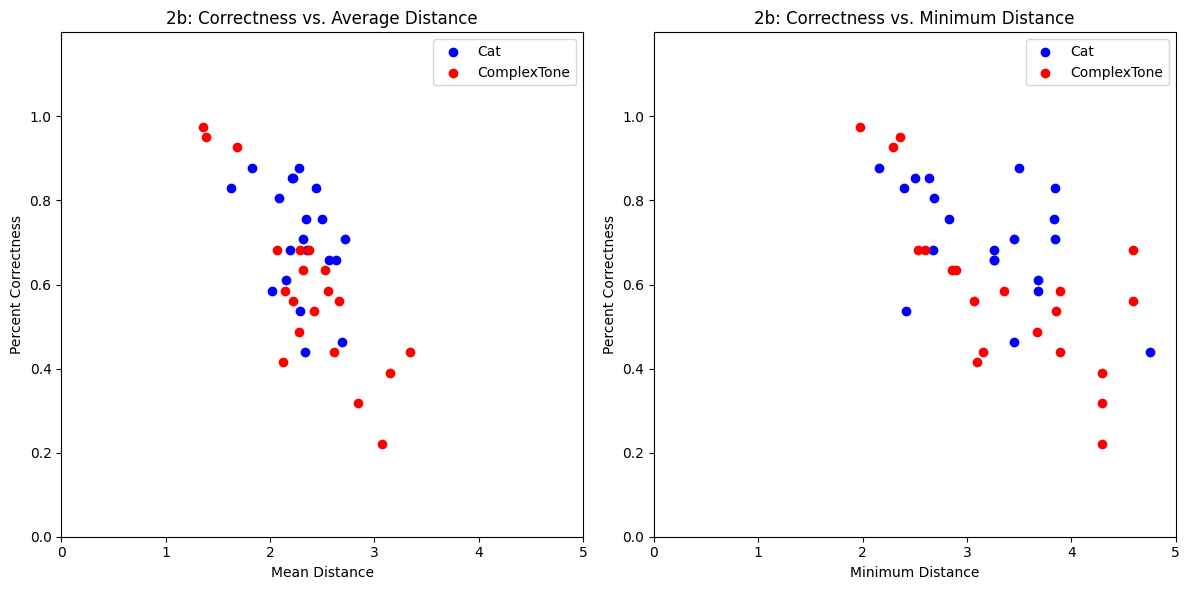

In [11]:
plot_distances2(filtered_df_cat, filtered_df_complexTone2)

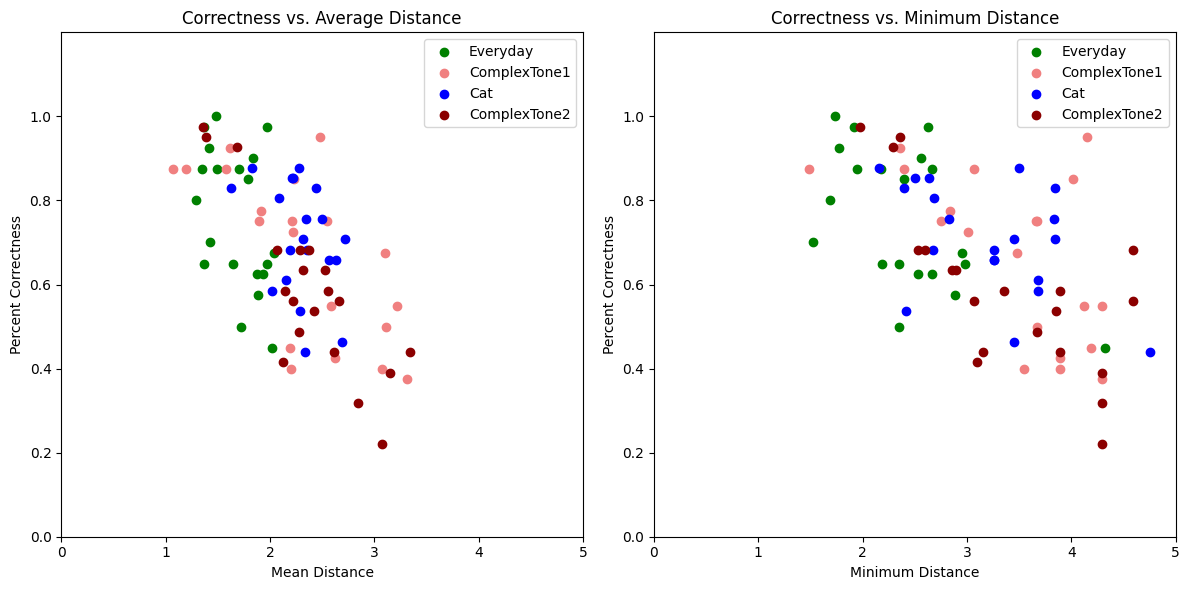

In [12]:
plot_distances_combined(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

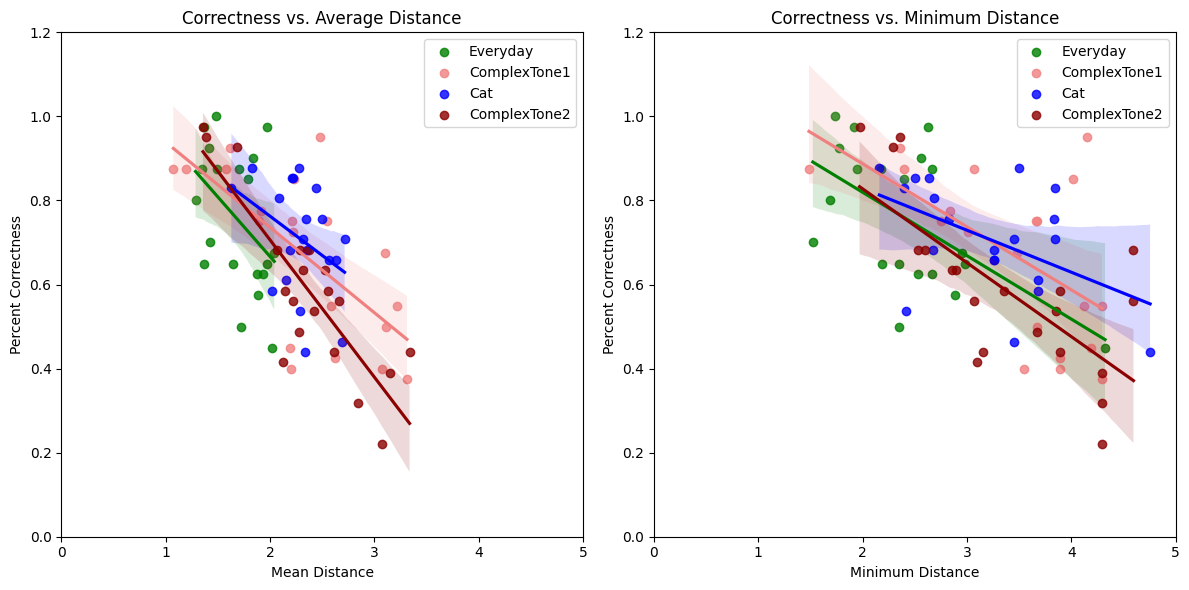

In [13]:
plot_distances_with_regression(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

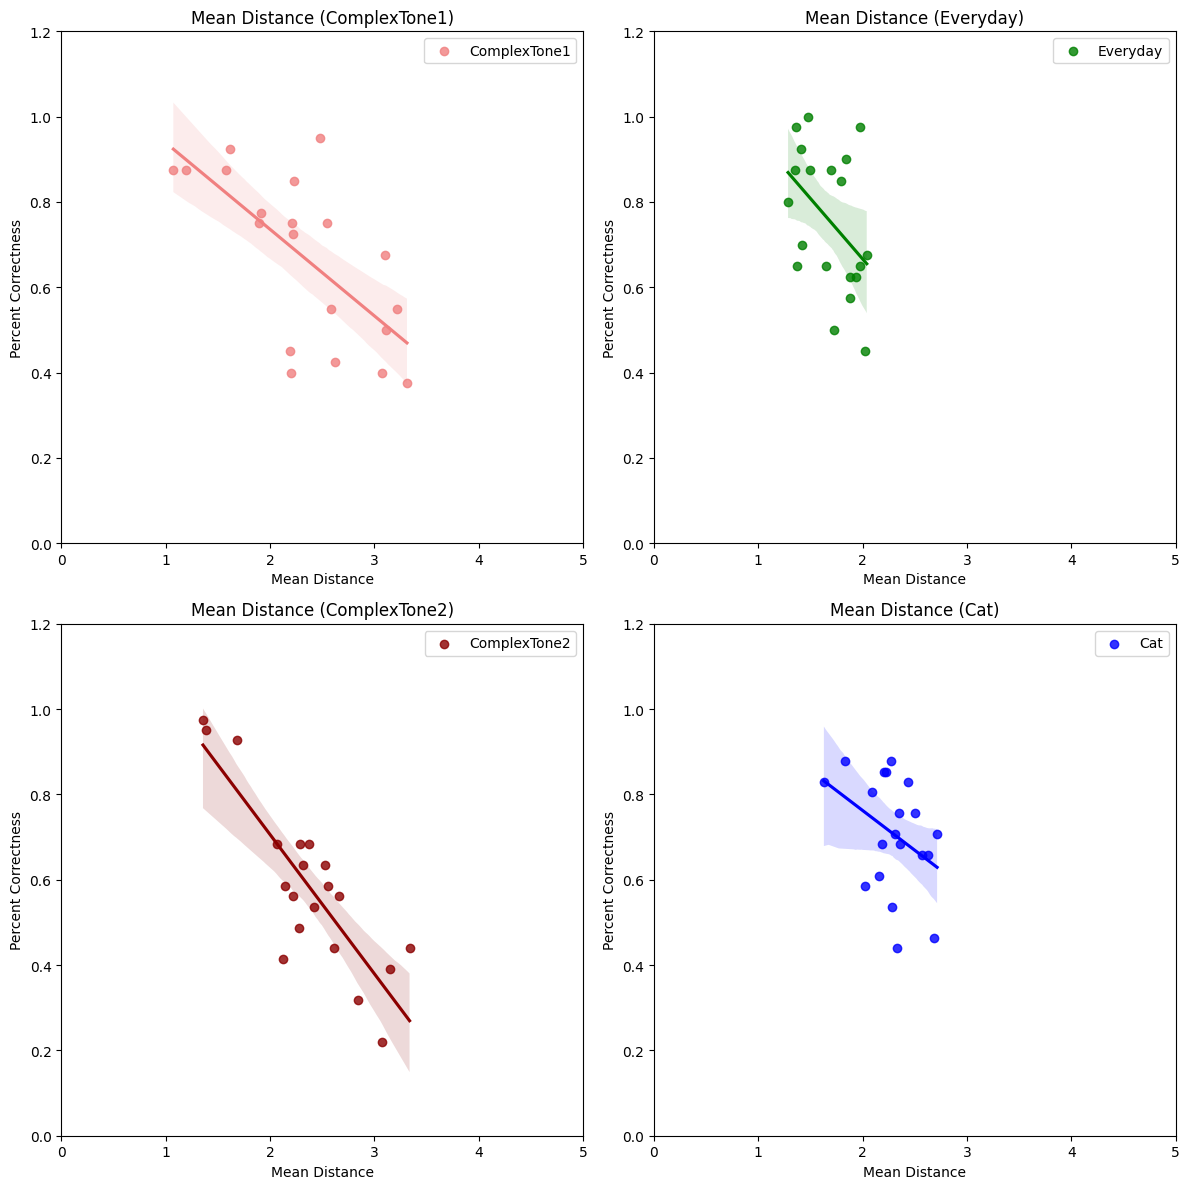

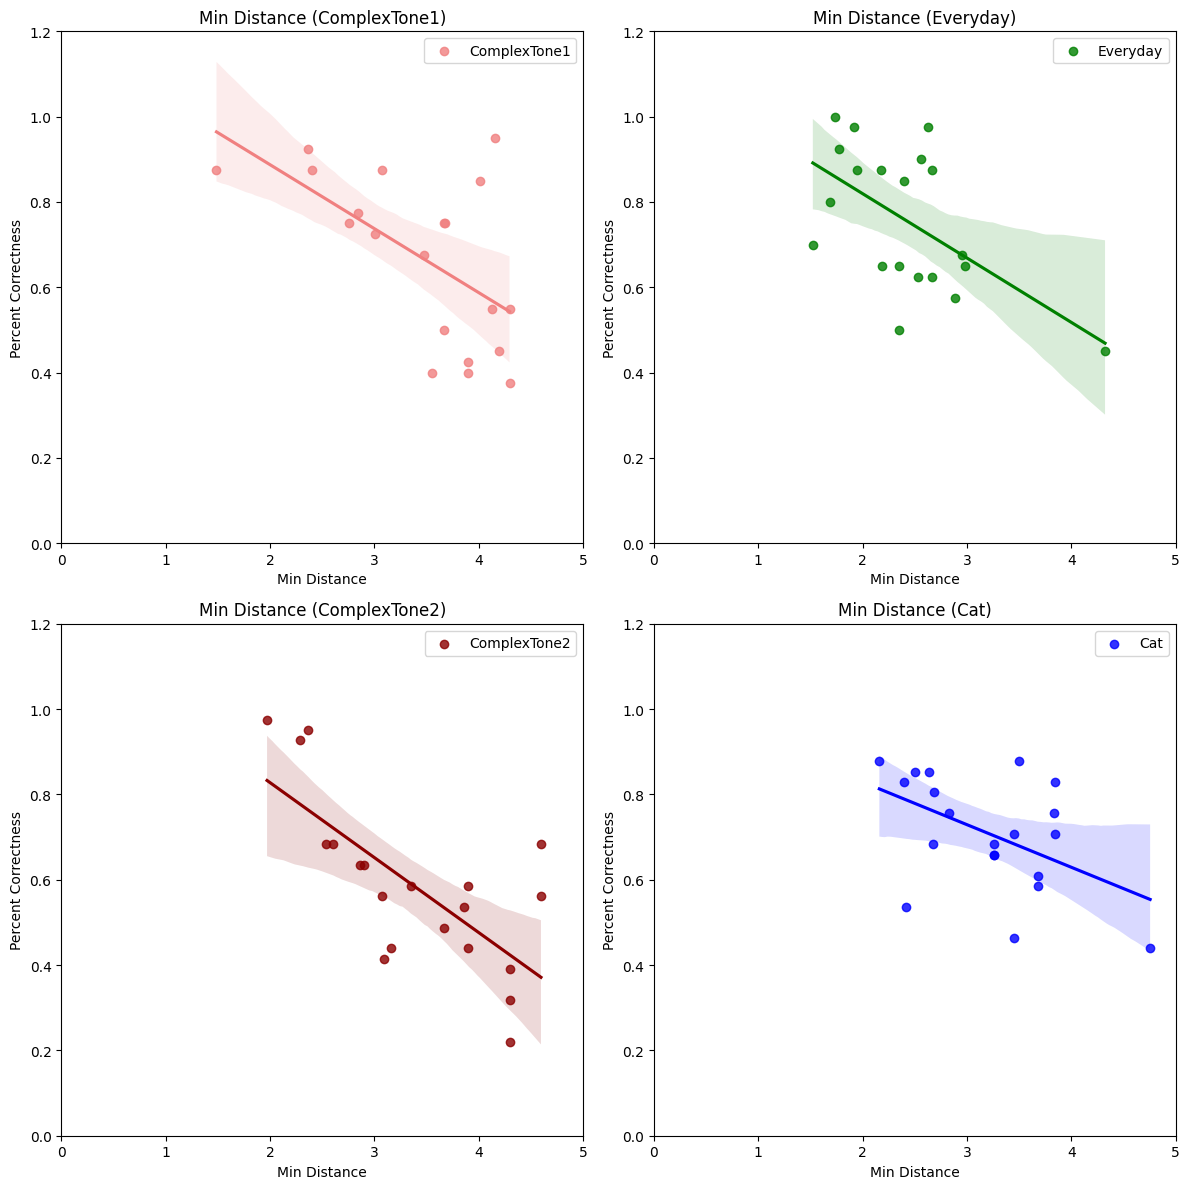

In [14]:
plot_2x2_mean_and_min_distances(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

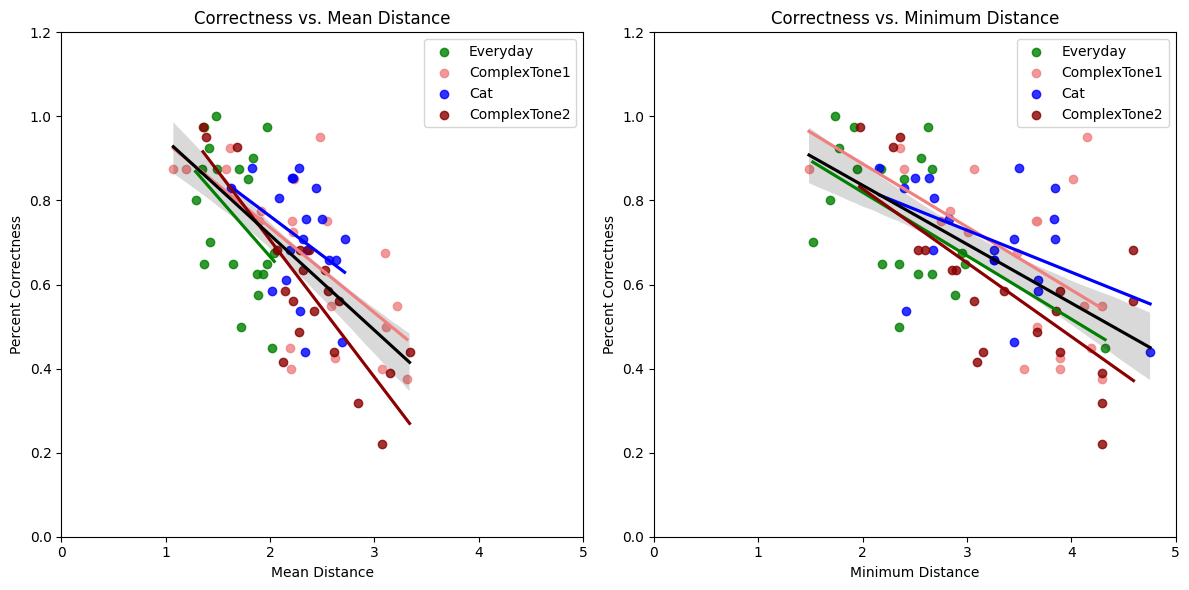

In [15]:
plot_combined_distances_with_regression_and_scatter(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/willmacbookair/Downloads/Poster plot/absent_relationship.svg'

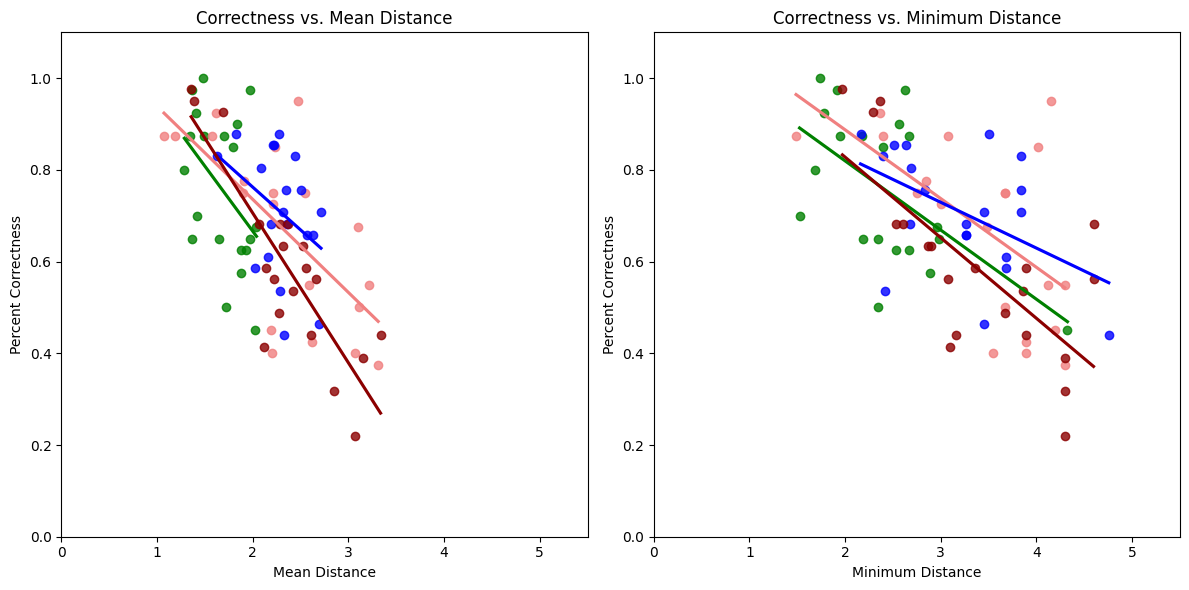

In [16]:
plot_combined_distances_with_regression_and_scatter2(filtered_df_everyday, filtered_df_complexTone1, filtered_df_cat, filtered_df_complexTone2)